## Task 2: Spam Detection using MultinomialNB 
- Load a text dataset (e.g., SMS Spam Collection or any public text 
dataset). 
- Preprocess using CountVectorizer or TfidfVectorizer. 
- Train a MultinomialNB classifier. 
- Evaluate: 
    1. Accuracy 
    2. Precision 
    3. Recall 
    4. Confusion Matrix 

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [27]:
df = pd.read_csv("spam.csv", encoding='latin-1')  # Adjust the path if needed

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [28]:
df = df[['v1', 'v2']] 
df.columns = ['label', 'message']  # Rename for clarity


df['label'] = df['label'].apply(lambda x: 1 if x == 'spam' else 0)


df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(df['message'])

y = df['label']

X.shape


(5572, 8404)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((4457, 8404), (1115, 8404))

In [31]:
classifier = MultinomialNB()

classifier.fit(X_train, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [32]:
# Predict on the test set
y_pred = classifier.predict(X_test)

# Check the first few predictions
y_pred[:10]


array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [33]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{conf_matrix}")

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report: \n", class_report)


Accuracy: 0.9803
Precision: 0.9267
Recall: 0.9267
Confusion Matrix: 
[[954  11]
 [ 11 139]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.93      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



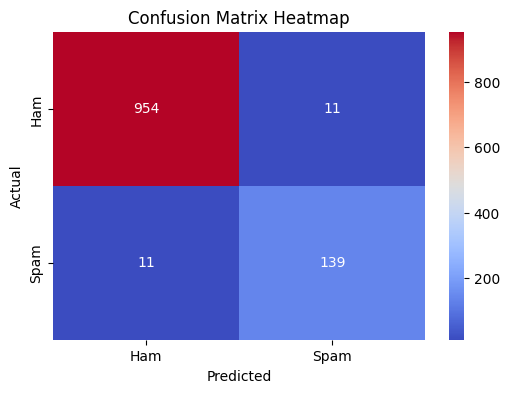

In [34]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()